<a href="https://colab.research.google.com/github/focussed/etivity1/blob/master/SampleEtivity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Query to solve
What type of profile of customer has taken out a loan?
and secondly, where customers who took out a loan more likely to have a poutcome of success?

In [0]:
# The Python modules uses in this tutorial are:

# - Pandas
# - Numpy
# - Matplotlib
# - Seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sort=True

url_train = 'https://raw.githubusercontent.com/focussed/etivity1/master/bank_test.csv'
df = pd.read_csv(url_train)

First, lets look at some of the data's general characteristics

In [95]:
df.head()

,age,job,education,balance,loan,contact,subscribed
0,32.0,technician,tertiary,392,no,cellular,no
1,39.0,technician,secondary,688,yes,cellular,no
2,59.0,retired,secondary,1035,yes,cellular,no
3,47.0,blue-collar,secondary,398,yes,cellular,no
4,54.0,retired,secondary,1004,no,cellular,no


In [96]:
df.describe()

,age,balance
count,995.000000,1000.00000
mean,42.059296,1437.51300
std,12.555130,2815.60663
min,19.000000,-980.00000
25%,33.000000,226.75000
50%,39.000000,562.00000
75%,50.000000,1724.00000
max,93.000000,31472.00000


The describe function treats the numeric fields of the dataset, calculating the useful statistic information such as mean, standard deviation, quartile values and max and min values for the 2000 samples.

A data clean is needed on the input forms as the age is not specified for all customers.  These rows should be identified and values entered.  Age may or may not be necessary for the bank.  However, for the bank to make decisions based on age may result in a false premise if the value is not recorded for all clients in the dataset.

It can be seen that the average balance amount is 1413 and the standard deviation is quite high at 3131



The next stage is to consider text based data and examine the individual columns for integrity.



In [97]:
df.shape[0]

1000

In [98]:
print('Percent of missing age values')
((df['age'].isna().sum())/(df.shape[0]))*100

Percent of missing age values


0.5

In [99]:
df.dtypes

age           float64
job            object
education      object
balance         int64
loan           object
contact        object
subscribed     object
dtype: object

In [100]:
#now we check for missing data 
# this shows the total count for information that is missing either empty or NaN
df.isna().sum()

age            5
job            4
education     50
balance        0
loan           0
contact       14
subscribed     0
dtype: int64

In [101]:
# this shows the total count for information that is missing either empty or NaN
df.isnull().sum()

age            5
job            4
education     50
balance        0
loan           0
contact       14
subscribed     0
dtype: int64

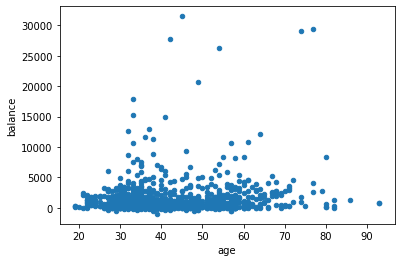

In [102]:
df.plot.scatter(x='age', y='balance')
plt.show()

# Analysis of columns
Discover dataset for customers with loans

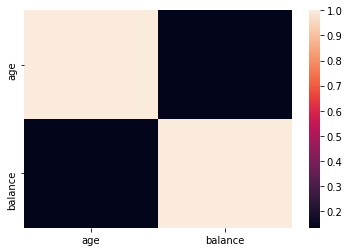

In [103]:
#correlation matrix
sns.heatmap(df.corr());

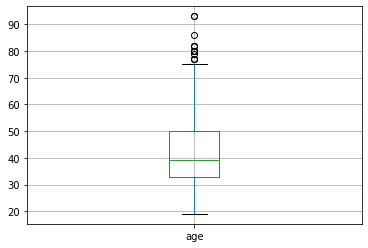

In [104]:
df.boxplot(column='age')
plt.show()

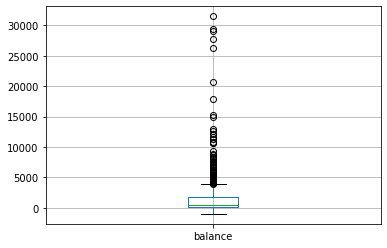

In [105]:
df.boxplot(column='balance')
plt.show()

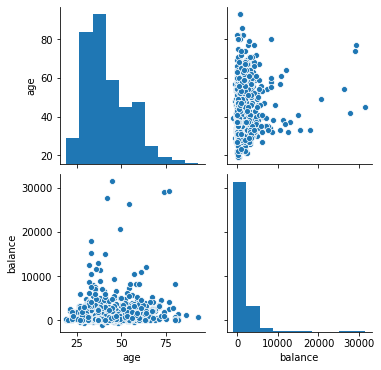

In [106]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance']].dropna())
plt.show()

In [107]:
print(df['age'].count())
print(df['age'].isnull().sum())
print(df['age'].value_counts())

995
5
35.0    52
32.0    46
31.0    45
37.0    44
33.0    43
        ..
72.0     2
75.0     1
20.0     1
79.0     1
86.0     1
Name: age, Length: 62, dtype: int64


In [108]:
print(df['job'].count())
print(df['job'].isnull().sum())
print(df['job'].value_counts())


996
4
management       211
technician       166
blue-collar      147
admin.           136
retired           89
services          87
student           47
self-employed     39
unemployed        32
housemaid         23
entrepreneur      19
Name: job, dtype: int64


In [109]:
print(df['education'].count())
print(df['education'].isnull().sum())
print(df['education'].value_counts())

950
50
secondary    517
tertiary     323
primary      110
Name: education, dtype: int64


In [110]:
print(df['loan'].count())
print(df['loan'].isnull().sum())
print(df['loan'].value_counts())

1000
0
no     870
yes    130
Name: loan, dtype: int64


In [111]:
print(df['contact'].count())
print(df['contact'].isnull().sum())
print(df['contact'].value_counts())

986
14
cellular     909
telephone     77
Name: contact, dtype: int64


In [112]:
print(df['subscribed'].count())
print(df['subscribed'].isnull().sum())
print(df['subscribed'].value_counts())

1000
0
no     500
yes    500
Name: subscribed, dtype: int64


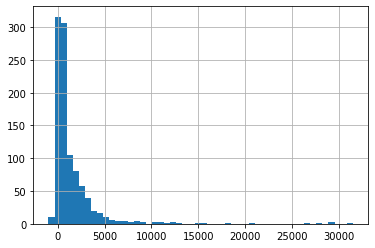

In [113]:
df['balance'].hist(bins=50)

## Mote pattern checks

In [114]:
test = df.groupby(['job','loan'])
test.size()

job            loan
admin.         no      114
               yes      22
blue-collar    no      123
               yes      24
entrepreneur   no       14
               yes       5
housemaid      no       22
               yes       1
management     no      188
               yes      23
retired        no       79
               yes      10
self-employed  no       36
               yes       3
services       no       72
               yes      15
student        no       47
technician     no      143
               yes      23
unemployed     no       28
               yes       4
dtype: int64

sample set

In [115]:
test = df.groupby(['job'])
test.describe()

age                        ... balance                  
               count       mean        std  ...     50%      75%      max
job                                         ...                          
admin.         136.0  40.727941   9.556434  ...   477.0  1573.25  14968.0
blue-collar    146.0  40.061644   9.424270  ...   398.0   979.50  15341.0
entrepreneur    19.0  43.894737  12.529497  ...   351.0  1923.50   5838.0
housemaid       23.0  48.913043  14.681197  ...   976.0  2071.50  12939.0
management     211.0  40.113744   9.242055  ...   715.0  2336.00  31472.0
retired         88.0  65.818182   9.218354  ...  1044.0  2590.00  29340.0
self-employed   37.0  39.378378  10.889218  ...   655.0  1219.00  10861.0
services        87.0  38.218391   9.304194  ...   443.0  1012.00  11650.0
student         46.0  26.108696   4.443363  ...   922.0  1794.00   6036.0
technician     166.0  40.819277  10.090673  ...   487.5  1309.75  10600.0
unemployed      32.0  40.437500   9.668497  ...   694.0  1320.75   7005.0

[11 rows x 16 columns]

In [116]:
test = df.groupby(['education'])
test.describe()

age                              ... balance                        
           count       mean        std   min  ...     25%    50%     75%      max
education                                     ...                                
primary    109.0  52.266055  14.893848  22.0  ...   158.0  450.0  1647.5  29340.0
secondary  516.0  41.571705  11.768837  19.0  ...   226.0  523.0  1435.0  15341.0
tertiary   320.0  39.159375  10.287843  21.0  ...   232.5  635.0  2138.5  31472.0

[3 rows x 16 columns]

In [117]:
test = df.groupby(['subscribed'])
test.describe()

age                              ... balance                         
            count       mean        std   min  ...     25%    50%      75%      max
subscribed                                     ...                                 
no          498.0  41.012048   9.109211  22.0  ...  144.00  405.5   919.25  26306.0
yes         497.0  43.108652  15.183829  19.0  ...  322.75  930.5  2325.25  31472.0

[2 rows x 16 columns]

In [0]:
#s1=pd.Series(df.education)
#s2=pd.Series(df.balance)
#s1.corr(s2,method=pearson)

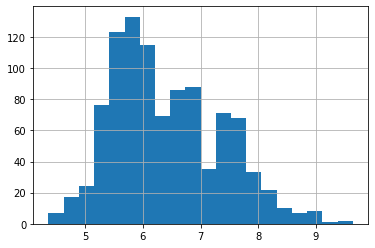

In [119]:
df['age_squareroot']=np.sqrt((df['age']))
df['age_squareroot'].hist(bins=20)

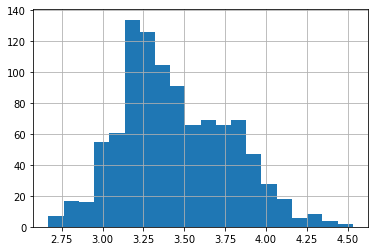

In [120]:
df['age_croot']=np.power((df['age']),1/3)
df['age_croot'].hist(bins=20)

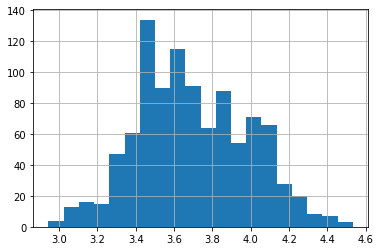

In [121]:
df['age_log']=np.log((df['age']))
df['age_log'].hist(bins=20)

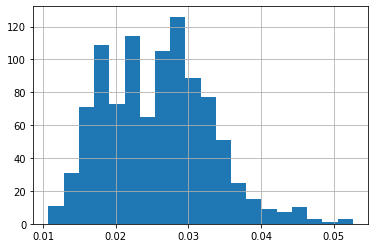

In [122]:
df['age_croot']=np.reciprocal((df['age']))
df['age_croot'].hist(bins=20)

In [123]:
test = df.groupby(['education','subscribed'])
test.size()

education  subscribed
primary    no             69
           yes            41
secondary  no            291
           yes           226
tertiary   no            125
           yes           198
dtype: int64

In [128]:
dfloan = df.loc[df.loan=='no']
dfloan.describe()

,age,balance,age_squareroot,age_croot,age_log
count,866.000000,870.000000,866.000000,866.000000,866.000000
mean,41.956120,1529.965517,6.405943,0.025977,3.692640
std,12.855009,2947.147892,0.959730,0.007460,0.294033
min,19.000000,-980.000000,4.358899,0.010753,2.944439
25%,32.000000,243.000000,5.656854,0.020102,3.465736
50%,38.000000,620.500000,6.164414,0.026316,3.637586
75%,49.750000,1796.000000,7.053301,0.031250,3.906972
max,93.000000,31472.000000,9.643651,0.052632,4.532599


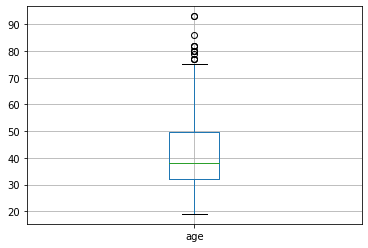

In [125]:
dfloan.boxplot(column='age')
plt.show()